<a href="https://colab.research.google.com/github/Zappyy/ADV_ML/blob/main/Adv_project_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install -U vistec_ser


     |████████████████████████████████| 913 kB 11.3 MB/s 
     |████████████████████████████████| 269 kB 46.5 MB/s 
     |████████████████████████████████| 50 kB 5.5 MB/s 
     |████████████████████████████████| 1.9 MB 51.9 MB/s 
     |████████████████████████████████| 52 kB 677 kB/s 
     |████████████████████████████████| 10.1 MB 47.7 MB/s 
     |████████████████████████████████| 60 kB 6.6 MB/s 
     |████████████████████████████████| 10.6 MB 34.7 MB/s 
     |████████████████████████████████| 829 kB 64.9 MB/s 
     |████████████████████████████████| 118 kB 53.9 MB/s 
     |████████████████████████████████| 234 kB 54.9 MB/s 
     |████████████████████████████████| 1.3 MB 60.5 MB/s 
     |████████████████████████████████| 54 kB 2.7 MB/s 
     |████████████████████████████████| 142 kB 48.2 MB/s 
     |████████████████████████████████| 294 kB 52.8 MB/s 
  Created wheel for python-multipart: filename=python_multipart-0.0.5-py3-none-any.whl size=31679 sha256=35b60d29051a7f689df7141e0f35280

In [2]:
from vistec_ser.data.datasets.thaiser import ThaiSERDataModule


emotions = ["neutral", "anger", "happiness", "sadness"]  # emotions to be used
max_len = 3 # maximum duration
num_mel_bins = 80  # number of mel filterbank

thaiser = ThaiSERDataModule(
    test_fold=0,
    include_zoom=True,
    download_dir="./dataset/",
    experiment_dir="./exp_colab",
    batch_size=64,
    sampling_rate=16000,  # final sampling rate
    num_mel_bins=num_mel_bins,  # number of mel filterbanks
    frame_length=50,  # frame length of STFT in ms
    frame_shift=10,  # frame shift of STFT in ms
    max_len=3,
    center_feats=True,
    scale_feats=True,
    emotions=emotions
)
thaiser.prepare_data()


+-----------------------------------+
| Downloading dataset...            |
+-----------------------------------+

>downloading studio1-10.zip ...
>downloading studio11-20.zip ...
>downloading studio21-30.zip ...
>downloading studio31-40.zip ...
>downloading studio41-50.zip ...
>downloading studio51-60.zip ...
>downloading studio61-70.zip ...
>downloading studio71-80.zip ...
>downloading zoom1-10.zip ...
>downloading zoom11-20.zip ...
Finished Downloading Dataset

+-----------------------------------+
| Extracting dataset...             |
+-----------------------------------+

>unzipping ./dataset//vistec-ser_tmpfiles/vistec/studio1-10.zip...
>unzipping ./dataset//vistec-ser_tmpfiles/vistec/studio11-20.zip...
>unzipping ./dataset//vistec-ser_tmpfiles/vistec/studio21-30.zip...
>unzipping ./dataset//vistec-ser_tmpfiles/vistec/studio31-40.zip...
>unzipping ./dataset//vistec-ser_tmpfiles/vistec/studio41-50.zip...
>unzipping ./dataset//vistec-ser_tmpfiles/vistec/studio51-60.zip...
>unzippin

In [3]:
thaiser.setup()
train_dataloader = thaiser.train_dataloader()
val_dataloader = thaiser.val_dataloader()
test_dataloader = thaiser.test_dataloader()

  0%|          | 0/12558 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/vistec_ser/data/ser_slice_dataset.py:95: UserWarning: torchaudio.compliance.kaldi.resample_waveform has been deprecated and will be removed from 0.10 release. Please use `torchaudio.functional.resample`.
  audio = kaldi.resample_waveform(audio, orig_freq=sample_rate, new_freq=self.sampling_rate)
  0%|          | 2/938 [00:00<01:05, 14.28it/s]

Extracting Features...


  0%|          | 3/735 [00:00<00:24, 29.30it/s]

Extracting Features...


100%|██████████| 735/735 [00:30<00:00, 23.86it/s]


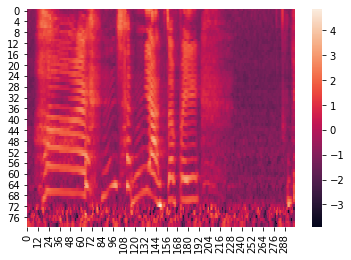

In [4]:
import seaborn as sns

train_iter = iter(train_dataloader)  # iterator for train_dataloader
samples = next(train_iter)
sns.heatmap(samples["feature"][0].numpy()[::-1])

In [14]:
from vistec_ser.models.network import CNN1DLSTMSlice


hparams = {
    "n_channels": [64, 64, 128, 128],
    "kernel_size": [5, 3, 3, 3],
    "pool_size": [4, 2, 2, 2],
    "lstm_unit": 128,
    "in_channel": num_mel_bins, 
    "sequence_length": max_len * thaiser.sec_to_frame, 
    "n_classes": len(emotions),
    "learning_rate": 1e-4
}
model = CNN1DLSTMSlice(hparams)

In [15]:
trainer.fit(model, train_dataloader=train_dataloader, val_dataloaders=val_dataloader)

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/trainer.py:532: LightningDeprecationWarning: `trainer.fit(train_dataloader)` is deprecated in v1.4 and will be removed in v1.6. Use `trainer.fit(train_dataloaders)` instead. HINT: added 's'
  "`trainer.fit(train_dataloader)` is deprecated in v1.4 and will be removed in v1.6."

   | Name               | Type       | Params
---------------------------------------------------
0  | cnn_layers         | Sequential | 174 K 
1  | cnn_layers.conv0   | Sequential | 64.1 K
2  | cnn_layers.conv0.0 | Conv1d     | 25.7 K
3  | cnn_layers.conv0.1 | LeakyReLU  | 0     
4  | cnn_layers.conv0.2 | LayerNorm  | 38.4 K
5  | cnn_layers.conv0.3 | MaxPool1d  | 0     
6  | cnn_layers.conv1   | Sequential | 22.0 K
7  | cnn_layers.conv1.0 | Conv1d     | 12.4 K
8  | cnn_layers.conv1.1 | LeakyReLU  | 0     
9  | cnn_layers.conv1.2 | LayerNorm  | 9.6 K 
10 | cnn_layers.conv1.3 | MaxPool1d  | 0     
11 | cnn_layers.conv2   | Sequential | 34.2 K
12 | cn

/usr/local/lib/python3.7/dist-packages/deprecate/deprecation.py:115: LightningDeprecationWarning: The `accuracy` was deprecated since v1.3.0 in favor of `torchmetrics.functional.classification.accuracy.accuracy`. It will be removed in v1.5.0.
  stream(template_mgs % msg_args)


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:652: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool1d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [16]:
%load_ext tensorboard
%tensorboard --logdir ./exp_colab

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/deprecate/deprecation.py:115: LightningDeprecationWarning: The `confusion_matrix` was deprecated since v1.3.0 in favor of `torchmetrics.functional.classification.confusion_matrix.confusion_matrix`. It will be removed in v1.5.0.
  stream(template_mgs % msg_args)


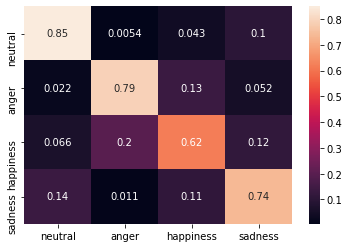

Weighted Accuracy: 74.92%, Unweighted Accuracy: 75.00%


In [17]:
from vistec_ser.evaluation.evaluate import evaluate_slice_model
import matplotlib.pyplot as plt
import pandas as pd


wa, ua, cm = evaluate_slice_model(model, test_dataloader, n_classes=thaiser.n_classes)
cm = pd.DataFrame(cm.numpy(), index=emotions, columns=emotions)

sns.heatmap(cm, annot=True)
plt.show()
print(f"Weighted Accuracy: {wa*100:.2f}%, Unweighted Accuracy: {ua*100:.2f}%")